## 14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.
### (a) Create a binary variable, mpg01 , that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.
### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
### (c) Split the data into a training set and a test set.
### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained

### Overview:
In this Auto Dataset we will be analyzing 9 features available to us. We will begin by understanding all the features, looking for patterns and trends. We will check for missing values and handle them then we will perform Exploratory Data Analysis. Then, we will build `mpg01` column where if mpg is greater than median then mpg01 will have a value of 0 and mpg is less than median then the value of `mpg01` will be 1. We will perform some more Data Visualization to investigate association of mpg01 with other features. We will split our data into Train and Test Data and then build a Logistic Regression on Train and Test Data. We will then choose variables which are most associated with mpg01 and build logistic Regression Model Based on that. We will also calculate Test Error for it.

### Logistic Regression:
* Logistic Regression is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds. 
* Logistic Regression is given by :
$$ln(\frac{pi}{(1-pi)}) = \beta0 + \beta1*X_1 + \beta2*X_2  … + B_k*K_k$$

[Source](https://www.ibm.com/topics/logistic-regression)

### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
auto_data = pd.read_csv('Auto.csv')

### Shape of Data

In [3]:
auto_data.shape

(397, 9)

### Checking for missing Values

In [4]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### Handling missing values and replacing it with mean of Horsepower

In [5]:
auto_data['horsepower'] = auto_data['horsepower'].fillna(auto_data['horsepower'].mean())

In [6]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### Data type of all the features available to us

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


# Answer 14 (a)
### Creating a binary variable, mpg01 , that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [8]:
auto_data['mpg'].median()

23.0

In [9]:
auto_data['mpg01'] = auto_data.apply(lambda x: 1 if x['mpg'] >= 23 else 0, axis=1)

In [10]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1


### Descriptive Statistics of Auto Dataset
* We can observe the count, mean, Standard Deviation, minimum value, maximum value, Quantile Values.

In [11]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,0.503778
std,7.825804,1.701577,104.379583,38.247388,847.904119,2.749995,3.690005,0.802549,0.500617
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


### Correlation in Dataset

In [12]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698,0.834672
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972,-0.760944
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664,-0.754522
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962,-0.662858
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265,-0.757516
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084,0.346069
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314,0.430619
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000,0.509982
mpg01,0.834672,-0.760944,-0.754522,-0.662858,-0.757516,0.346069,0.430619,0.509982,1.000000


### The features which seems closely related to mpg01 are:
* mpg shows high correlation with mpg01
* cylinders, displacement,weight, horsepower show strong negative correlation with mpg01
* Origin shows medium correlation with mpg01
* acceleration and year show weak correlation with mpg01

### Countplot to observe data based on mpg01 variable:

* As we can observe that we have almost same incidences where mpg is greater than 23 (median) and where mpg is less than 23 (median)

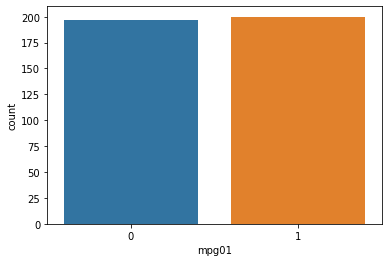

In [13]:
sns.countplot(x='mpg01',data=auto_data,label='count')
plt.show();

### Pairplot to observe Correlation between variables with mpg01

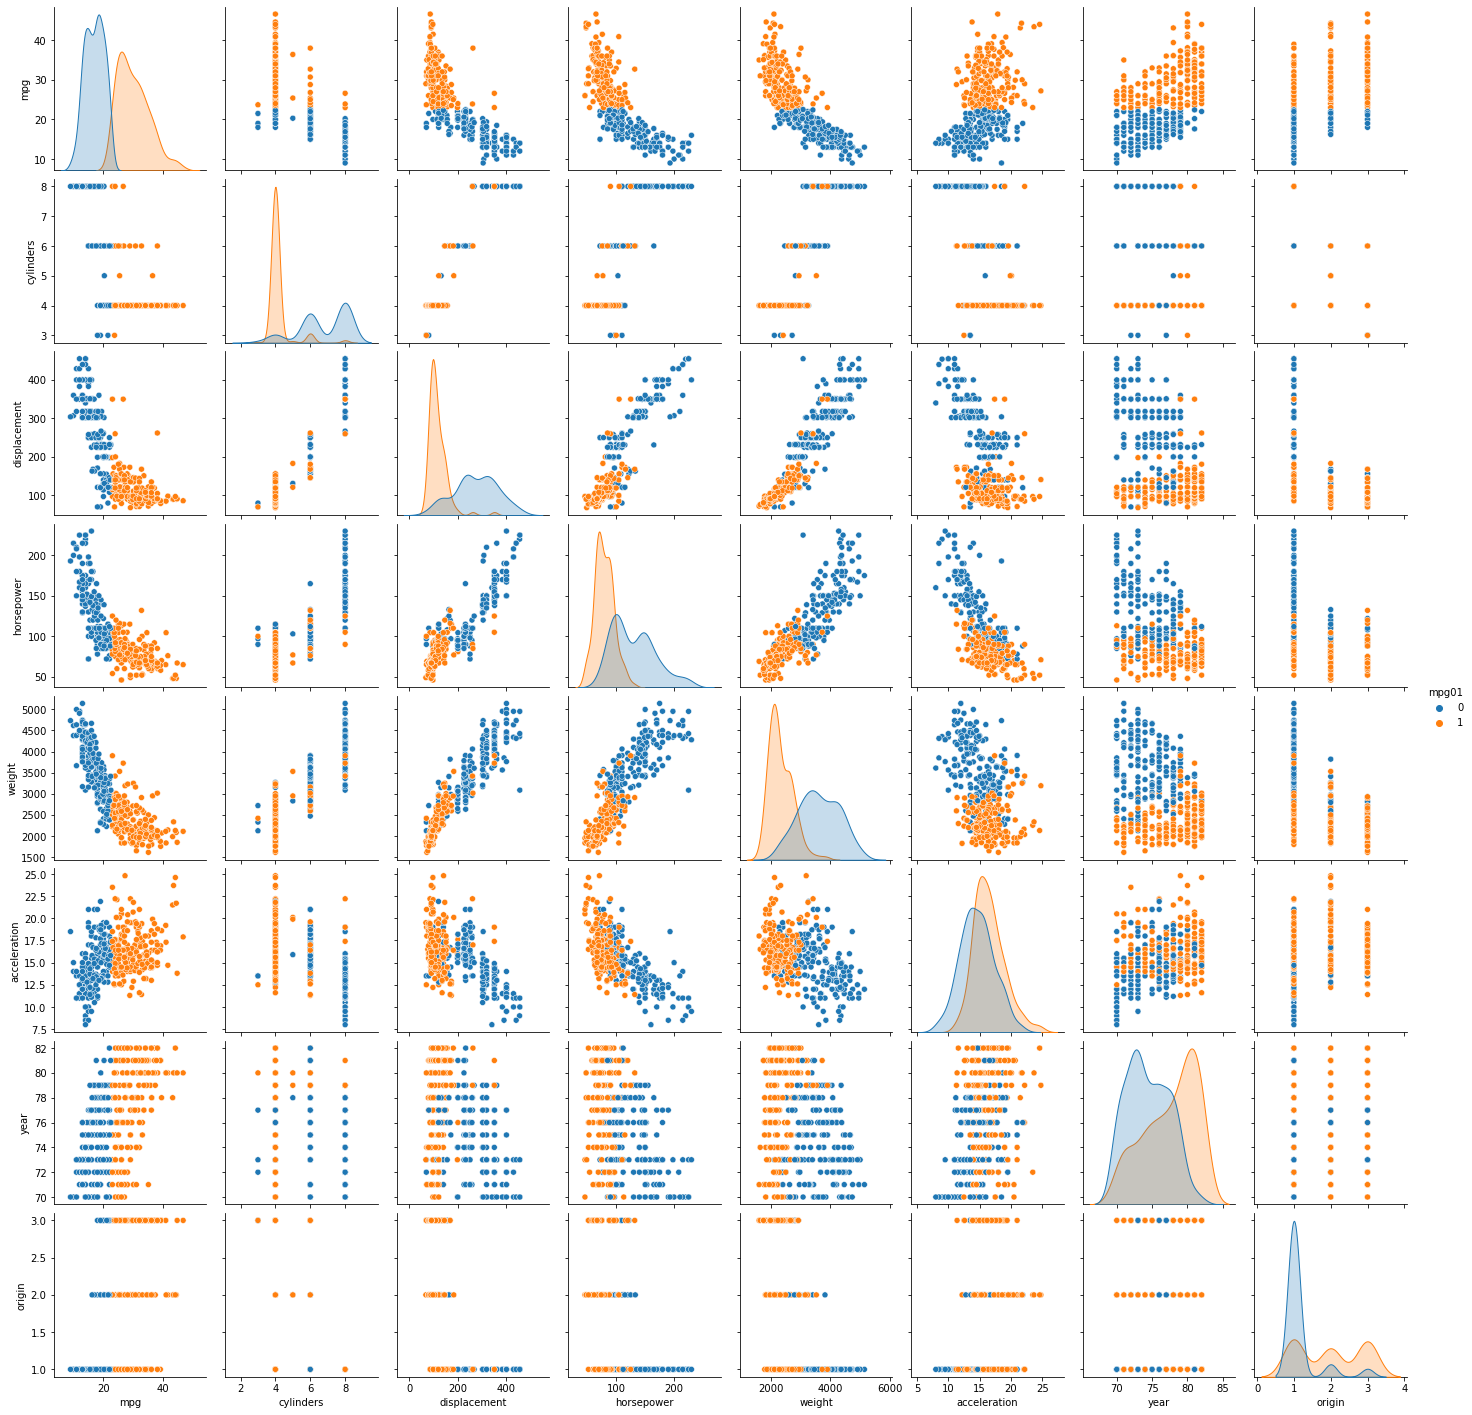

In [14]:
sns.pairplot(auto_data, hue='mpg01')
plt.savefig("Auto_data_pairplot_with_mpg01")
plt.show()

# Answer 14 (b)
### Based on Correlation Matrix and Pairplot of Variables
### The most associated variables with mpg01 are mpg, cylinders, weight, horsepower, displacement,
### Dropping all the other variables and considering just these

In [15]:
X = auto_data.drop(labels=['name','acceleration','year','origin','mpg01'],axis=1)
y = auto_data['mpg01']

In [16]:
X.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mpg01, dtype: int64

# Answer 14(c)

### Split the Data into Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

# Answer 14(b)

### Training the Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(max_iter=3000)

In [22]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

### Model Intercept and Model Coefficients

In [23]:
model.intercept_

array([-57.24347023])

In [24]:
model.coef_

array([[ 2.52547235,  0.09797001, -0.03391771, -0.03449484,  0.00284831]])

### Testing Model

In [25]:
y_pred = model.predict(X_test)

### Measuring the Performance of Logistic Regression Model

In [26]:
print("Logistic Model Accuracy : {:.2f}".format(model.score(X,y)))

Logistic Model Accuracy : 0.99


### The reason we are getting such high accuracy is just because we have taken only the most associated variables into consideration and this is not a good practice. If we consider all the variables which play a role in the dataset then I am sure the accuracy will fall way down and apparrently that model will be something which we would be able to trust.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

### Classification Report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.97      0.99        69

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



### Here precision tells us the percentage of correct positive predictions relative to total positive predictions. Here weight avg value of precision 98%.
### Recall tells us the Percentage of correct positive predictions relative to total actual positives. Here weight avg value of Recall is 98%.
### F1 score is weighted harmonic mean of precision and recall. The closer to 1 the better the model. Our F1 score is 0.98

### Confusion matrix for the accuracy of the model

In [29]:
confusionmatrix = confusion_matrix(y_test,y_pred)

In [30]:
print(confusionmatrix)

[[51  0]
 [ 2 67]]


* True Negative value = 51 
* False Positive value = 0 (Type 1 Error)
* False Negative value = 2 (Type 2 Error) 
* True Positive value = 67

### Heatmap of Confusion Matrix

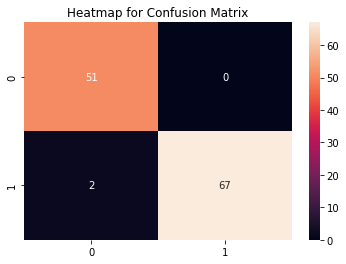

In [31]:
sns.heatmap(confusionmatrix, annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.savefig("Heatmap_for_confusion_matrix")
plt.show();

### Test Error of Model Obtained
$$\frac{(False Positive + False Negative)}{(True Positive + True negative + False Positive + False Negative)}$$

In [32]:
testError = (2 + 0)/(51+0+2+67)
print("The Test Error of the Model Obtained is : {:.2f} %".format(testError * 100))

The Test Error of the Model Obtained is : 1.67 %


# Conclusion

# We can observe that we are getting such high accuracy in our Logistic Regression Model this is because we have taken only the most associated variables into consideration and this is not a good practice. If we consider all the features available to us in the dataset then I am sure the accuracy will fall way down and apparrently that model will be something which we would be able to trust. For now, this model is unreliable.